# ⭐Imports


In [1]:
from processing_functions import *
%matplotlib inline

TensorFlow Version:  2.1.0


---

# ⭐ Building Classifier

## 🔵 Step 1: Preprocess Data (Create Dataset)

In [2]:
# MAIN
data_s = np.array(pd.read_csv('data_s_csv').iloc[:, 1:])
data_b = np.array(pd.read_csv('data_b_csv').iloc[:, 1:])

# # LOG
# data_s = np.array(pd.read_csv('data_s_log_csv').iloc[:, 1:])
# data_b = np.array(pd.read_csv('data_b_log_csv').iloc[:, 1:])

# # NORMAL
# data_s = np.array(pd.read_csv('data_s_normal_csv').iloc[:, 1:])
# data_b = np.array(pd.read_csv('data_b_normal_csv').iloc[:, 1:])

In [3]:
# Create s&b labels
slabels = np.ones(data_s.shape[0]//40)
blabels = np.zeros(data_b.shape[0]//40)

# Concatenate examples and labels
data = np.concatenate((data_s, data_b), axis=0)
labels = np.concatenate((slabels, blabels), axis=0)

# Define useful quantities
num_of_examples = data.shape[0] // 40     # divide by 40 because 1st dim is 40 * num_of_examples
num_of_labels = labels.shape[0]
print('Total Events:', num_of_examples)
print('Total Labels:', num_of_labels)

# Reshape examples (for sklearn)
examples = data.reshape(num_of_examples, 1600)
print('Shape: ', examples.shape)

Total Events: 29449
Total Labels: 29449
Shape:  (29449, 1600)


In [4]:
train_examples, test_examples, train_labels, test_labels = train_test_split(examples, labels, test_size=0.15, random_state=42)
train_examples, val_examples, train_labels, val_labels = train_test_split(train_examples, train_labels, test_size=0.18, random_state=42)

print('Train: ', train_examples.shape, train_labels.shape)
print('Val: ', val_examples.shape, val_labels.shape)
print('Test: ', test_examples.shape, test_labels.shape)

Train:  (20525, 1600) (20525,)
Val:  (4506, 1600) (4506,)
Test:  (4418, 1600) (4418,)


## 🔵 Step 2: Create Models

### 🔴 Instantiate Models

In [5]:
import sklearn.discriminant_analysis
random.seed(42)
decision_tree = DecisionTreeClassifier(random_state=42)
naive_bayes = MultinomialNB()
naive_bayes_g = GaussianNB()
bagging = BaggingClassifier(random_state=42, n_jobs=-1)
random_forest = RandomForestClassifier(random_state=42, n_jobs=-1)
svm = SVC(random_state=42)
adaboost = AdaBoostClassifier(random_state=42)
SGD = sklearn.linear_model.SGDClassifier(random_state=42)
LDA = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
KNN = sklearn.neighbors.KNeighborsClassifier()
BDT = sklearn.ensemble.GradientBoostingClassifier()

models = [decision_tree, naive_bayes, naive_bayes_g, bagging, random_forest, svm, adaboost, SGD, LDA, KNN, BDT]

## 🔵 Step 3: Quick Model Comparison

**Note**: No cross validation, no hyperparameter tuning

### 🔴 Compare Models' f1_score

In [6]:
# Fit Models
for model in models:
    model.fit(train_examples, train_labels)

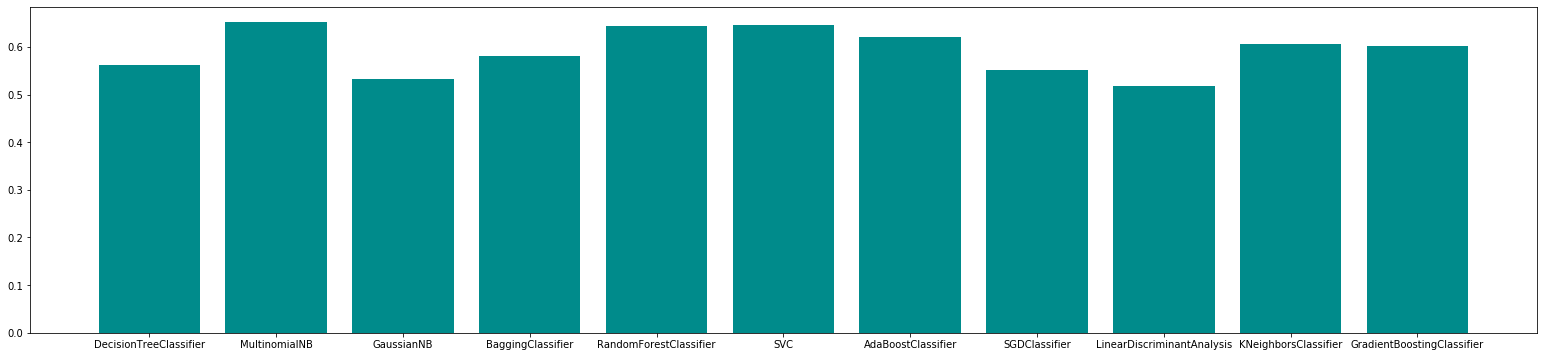

Top 5 Algorithms: 

MultinomialNB
SVC
RandomForestClassifier
AdaBoostClassifier
KNeighborsClassifier


In [7]:
# Compare f1 score
from sklearn.metrics import f1_score

model_names = []
scores = []

for model in models:
    
    labels = test_labels
    preds = model.predict(test_examples)
    scores.append(f1_score(labels, preds))
    model_names.append(model.__class__.__name__)

    
fig, ax = plt.subplots(figsize=(27, 6))
plt.bar(model_names, scores, color="darkcyan")
plt.show()

# Print top 5 algorithms
n = 5
max_i = np.flip(np.argsort(scores)[-n:])

print("Top 5 Algorithms: \n")

for i in max_i:
    print(model_names[i])


### 🔴 Compare Models' CMX

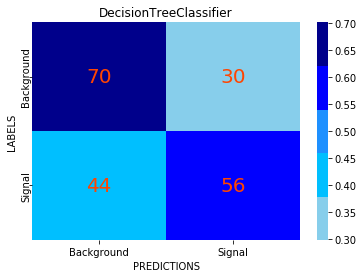

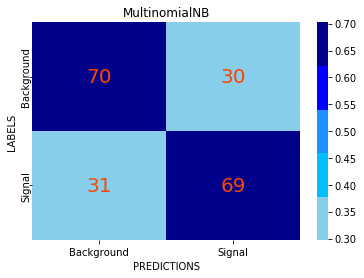

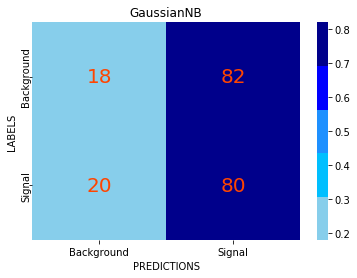

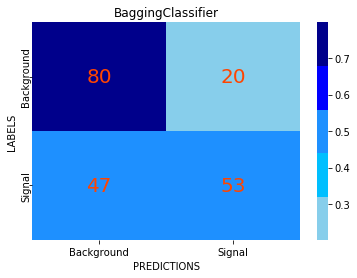

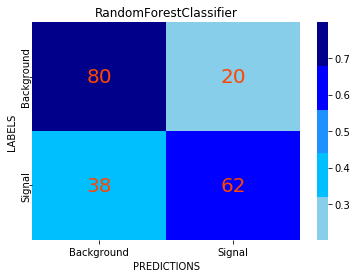

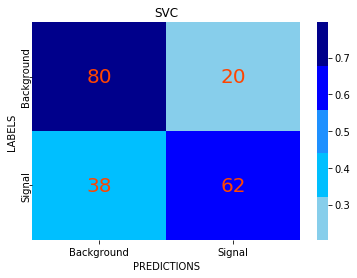

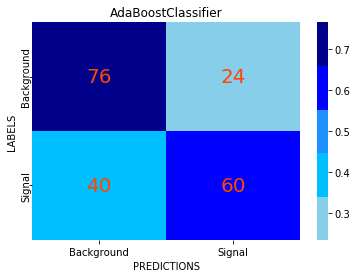

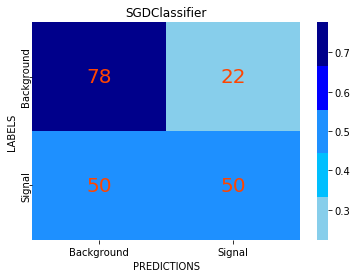

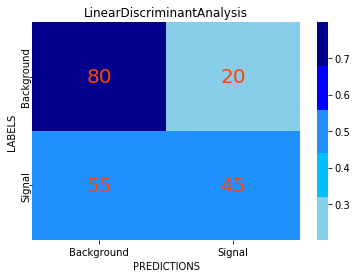

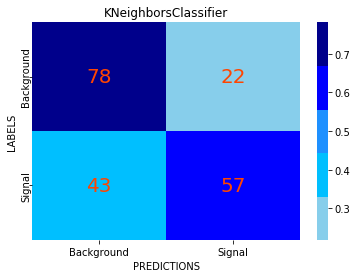

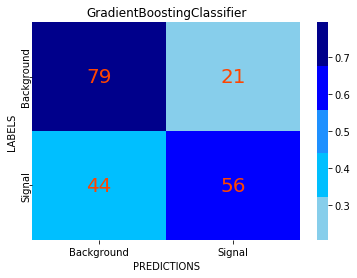

In [8]:
cmx_sklearn(models, test_examples, test_labels)

## 🔵 Step 4: Hyperparameter Tuning (Hardcore)

In [6]:
# Naive Bayes
alpha = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

# Bagging
n_estimators_bagging = [10, 20, 30, 50, 100, 200, 300]
max_samples_bagging = [0.1, 0.2, 0.5, 1.0, 2.0, 3.0, 5.0]
max_features_bagging = [0.5, 1.0, 2.0, 3.0, 50.0, 200]

# Random Forests
criterion = ['gini', 'entropy']
n_estimators_rf = [100, 150, 200]
max_depth_rf = [None, 1, 3, 5, 10]
min_samples_leaf_rf = [5, 10]
min_samples_split_rf = [5, 10]


# SVC
kernel = ['rbf']
c_parameter = [0.0001, 0.001, 0.01, 0.1, 1, 10]
gamma = [0.0001, 0.001, 0.01, 0.1, 1]


# AdaBoost
n_estimators_ada = [10, 30, 50, 100, 200, 500]
learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]


# Hyperparameters
naive_bayes_parameters = {'alpha': alpha}
naive_bayes_g_parameters = {'var_smoothing': np.logspace(0,-9, num=1000)}
bagging_parameters = {'n_estimators': n_estimators_bagging, 'max_features': max_features_bagging, 'max_samples': max_samples_bagging}
random_forest_parameters = {'n_estimators': n_estimators_rf, 'max_depth': max_depth_rf, 'min_samples_leaf': min_samples_leaf_rf, 'min_samples_split': min_samples_split_rf}
svm_parameters = {'kernel': kernel, 'C': c_parameter, 'gamma': gamma}
adaboost_parameters = {'n_estimators': n_estimators_ada, 'learning_rate': learning_rate}

# Scoring object using accuracy
scorer = make_scorer(accuracy_score)


clfs_param =[(naive_bayes, naive_bayes_parameters), 
             (naive_bayes_g, naive_bayes_g_parameters), 
             (bagging, bagging_parameters), 
             (random_forest, random_forest_parameters), 
             (svm, svm_parameters), 
             (adaboost, adaboost_parameters)]

## 🔵 Step 4: Hyperparameter Tuning (Softcore)

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from time import time


# Naive Bayes
alpha = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

# Bagging
n_estimators_bagging = [300, 1]
max_samples_bagging = [1.0]
max_features_bagging = [0.5]

# Random Forests
criterion = ['gini']
n_estimators_rf = [150, 1]
max_depth_rf = [None]
min_samples_leaf_rf = [5]
min_samples_split_rf = [5]

# SVC
kernel = ['rbf']
c_parameter = [0.1, 1]
gamma = [0.01, 0.1, 1]


# AdaBoost
n_estimators_ada = [500]
learning_rate = [0.5]







# Hyperparameters
naive_bayes_parameters = {'alpha': alpha}
bagging_parameters = {'n_estimators': n_estimators_bagging, 'max_features': max_features_bagging, 'max_samples': max_samples_bagging}
random_forest_parameters = {'n_estimators': n_estimators_rf, 'max_depth': max_depth_rf, 'min_samples_leaf': min_samples_leaf_rf, 'min_samples_split': min_samples_split_rf}
svm_parameters = {'kernel': kernel, 'C': c_parameter, 'gamma': gamma}
adaboost_parameters = {'n_estimators': n_estimators_ada, 'learning_rate': learning_rate}

# Scoring object using accuracy
scorer = make_scorer(f1_score)


clfs_param =[(naive_bayes, naive_bayes_parameters), 
             (svm, svm_parameters), 
             (bagging, bagging_parameters), 
             (random_forest, random_forest_parameters), 
             (adaboost, adaboost_parameters)]

In [29]:
# Create list to store models
models = []
unopt_f1 = []
f1 = []

# Perform grid search
for clf, parameter in clfs_param:
    print('\n{}\n'.format(clf.__class__.__name__))
    
    grid_obj = GridSearchCV(clf, parameter, scoring=scorer, n_jobs = 6)
    
    # Perform grid search
    start = time.time()
    grid_fit = grid_obj.fit(train_examples, train_labels)
    end = time.time()
    print('Time to tune: {}s'.format(round(end - start), 2))
    
    # Get best estimator
    best_clf = grid_fit.best_estimator_
    models.append(best_clf)
    
    # Make predictions using the unoptimized and model
    start = time.time()
    predictions = (clf.fit(train_examples, train_labels)).predict(val_examples)
    best_predictions = best_clf.predict(val_examples)
    
    predictions_train = (clf.fit(train_examples, train_labels)).predict(train_examples)
    best_predictions_train = best_clf.predict(train_examples)
    end = time.time()
    print('Time to fit-predict: {}s\n'.format(round(end - start), 2))
    
    # Check hyperparameters
    print('Unoptimised: {}\n'.format(clf.get_params(deep = True)))
    print('Optimised: {}\n'.format(best_clf.get_params(deep = True)))
    
    # Print Results
    print("\nUnoptimised-f1-training: {:.4f}".format(f1_score(train_labels, predictions_train)))
    print("Optimised-f1-training: {:.4f}".format(f1_score(train_labels, best_predictions_train)))
    
    print("\nUnoptimised-f1-validation: {:.4f}".format(f1_score(val_labels, predictions)))
    print("Optimised-f1-validation: {:.4f}".format(f1_score(val_labels, best_predictions)))
    
    print('\n\n=============================================================================================')
    
    unopt_f1.append(accuracy_score(val_labels, predictions))
    f1.append(accuracy_score(val_labels, best_predictions))
    
print('All unoptimised f1 (validation): {}'.format(unopt_f1))
print('Best unoptimised f1 (validation): {}\n'.format(max(unopt_f1)))
print('All optimised f1 (validation): {}'.format(f1))
print('Best optimised f1 (validation): {}'.format(max(f1)))


MultinomialNB

Time to tune: 4s
Time to fit-predict: 0s

Unoptimised: {'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

Optimised: {'alpha': 2, 'class_prior': None, 'fit_prior': True}


Unoptimised-Accuracy-training: 0.7205
Optimised-Accuracy-training: 0.7204

Unoptimised-Accuracy-validation: 0.7022
Optimised-Accuracy-validation: 0.7024

 
 

GaussianNB

Time to tune: 435s
Time to fit-predict: 3s

Unoptimised: {'priors': None, 'var_smoothing': 1e-09}

Optimised: {'priors': None, 'var_smoothing': 1.4251026703029963e-05}


Unoptimised-Accuracy-training: 0.4814
Optimised-Accuracy-training: 0.6268

Unoptimised-Accuracy-validation: 0.4423
Optimised-Accuracy-validation: 0.5994

 
 

BaggingClassifier

Time to tune: 4789s
Time to fit-predict: 136s

Unoptimised: {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': 6, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Optim

## 🔵 Step 4: f1 & Confusion Matrix

In [ ]:
# Compare f1 score
from sklearn.metrics import f1_score

model_names = []
scores = []

for model in models:
    
    labels = test_labels
    preds = model.predict(test_examples)
    scores.append(f1_score(labels, preds))
    model_names.append(model.__class__.__name__)

    
fig, ax = plt.subplots(figsize=(27, 6))
plt.bar(model_names, scores, color="darkcyan")
plt.show()

# Print top 5 algorithms
n = 5
max_i = np.flip(np.argsort(scores)[-n:])

print("Top 5 Algorithms: \n")

for i in max_i:
    print(model_names[i])


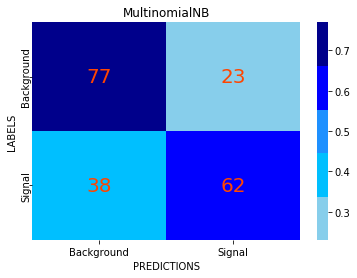

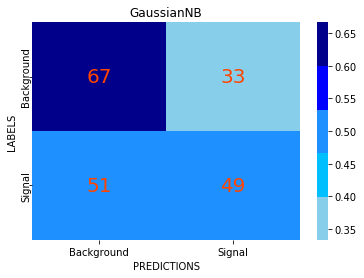

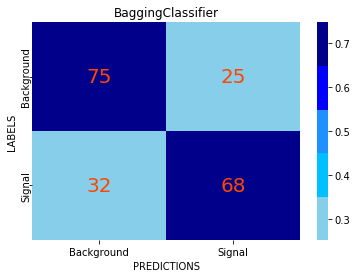

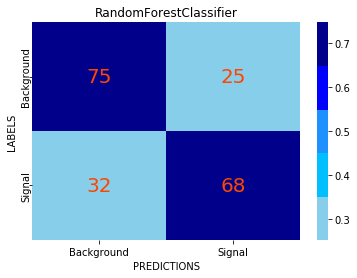

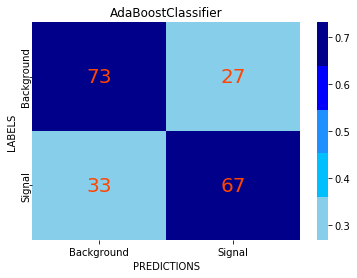

In [30]:
cmx_sklearn(models, test_examples, test_labels)

In [8]:
model_rf = RandomForestClassifier(
                                  random_state=42, 
                                  n_jobs=4, 
                                  criterion = 'gini', 
                                  n_estimators = 150,
                                  max_depth = None,
                                  min_samples_leaf = 5,
                                  min_samples_split = 5
)

model_bagg = BaggingClassifier(random_state=42, 
                               n_jobs=4, 
                               base_estimator=model_rf, 
                               n_estimators=300,
                              max_features=0.5,
                               max_samples=1.0)


In [ ]:
predictions = model_bagg.predict(test_examples)

print("\nAccuracy-validation: {:.4f}".format(accuracy_score(test_labels, predictions)))

labels = predictions
preds = test_labels

cmx_non_normal = tf.math.confusion_matrix(labels, preds).numpy() # Create Confusion Matrix
cmx0 = cmx_non_normal[0] / cmx_non_normal[0].sum()
cmx1 = cmx_non_normal[1] / cmx_non_normal[1].sum()
cmx = np.stack((cmx0, cmx1), axis=0)


# Plot confusion matrix
fig, ax = plt.subplots()
sns.heatmap(cmx, cmap=['skyblue', 'deepskyblue', 'dodgerblue', 'blue',  'darkblue'])

# xylabels and title
plt.title(remove_text_inside_brackets(str(model)))
plt.xlabel('PREDICTIONS')
plt.ylabel('LABELS')

# Label ticks
ax.set_xticklabels(['Background', 'Signal'])
ax.set_yticklabels(['Background', 'Signal'])
# Align ticks
plt.setp(ax.get_xticklabels(), rotation=0, ha="center",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=90, ha="center",
         rotation_mode="anchor")

# Text Annotations for Blocks in CMX
for i in range(2):
    for j in range(2):

        value = int(np.round(100*cmx[i, j], 0))

        text = ax.text(j+0.5, 
                       i+0.5, 
                       value,
                       ha="center", 
                       va="center", 
                       color="orangered", 
                       fontsize = 20)

plt.show()


In [9]:
predictions = (model_bagg.fit(train_examples, train_labels)).predict(val_examples)

predictions_train = (model_bagg.fit(train_examples, train_labels)).predict(train_examples)

# Print Results
print("\nAccuracy-Training: {:.4f}".format(accuracy_score(train_labels, predictions_train)))

print("\nAccuracy-validation: {:.4f}".format(accuracy_score(val_labels, predictions)))

print('\n \n \n=============================================================================================')

Unoptomised: {'base_estimator__bootstrap': True, 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': 'auto', 'base_estimator__max_leaf_nodes': None, 'base_estimator__max_samples': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 5, 'base_estimator__min_samples_split': 5, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__n_estimators': 150, 'base_estimator__n_jobs': 4, 'base_estimator__oob_score': False, 'base_estimator__random_state': 42, 'base_estimator__verbose': 0, 'base_estimator__warm_start': False, 'base_estimator': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_

In [ ]:
model_bagg = BaggingClassifier(random_state=42, n_jobs=-1)
model_rf = RandomForestClassifier(random_state=42, n_jobs=-1, criterion = 'gini', 
n_estimators = 150,
max_depth = None,
min_samples_leaf = 5,
min_samples_split = 5)


bagg_param_final = {'base_estimator': [model_rf], 'n_estimators': [300], 'max_features': [0.5], 'max_samples': [1.0]}



grid_obj = GridSearchCV(model_bagg, bagg_param_final, scoring=scorer, n_jobs = -1, verbose = 5)


# Perform grid search
start = time.time()
grid_fit = grid_obj.fit(train_examples, train_labels)
end = time.time()
print('Time to tune: {}s\n'.format(round(end - start), 2))

# Get best estimator
best_clf = grid_fit.best_estimator_
models.append(best_clf)

# Make predictions using the unoptimized and model
predictions = (model_bagg.fit(train_examples, train_labels)).predict(val_examples)
best_predictions = best_clf.predict(val_examples)

predictions_train = (model_bagg.fit(train_examples, train_labels)).predict(train_examples)
best_predictions_train = best_clf.predict(train_examples)

# Check hyperparameters
print('Unoptomised: {}\n'.format(model_bagg.get_params(deep = True)))
print('Optomised: {}\n'.format(best_clf.get_params(deep = True)))

# Print Results
print("\nUnoptimised-Accuracy-Training: {:.4f}".format(accuracy_score(train_labels, predictions_train)))
print("Optimised-Accuracy-training: {:.4f}".format(accuracy_score(train_labels, best_predictions_train)))

print("\nUnoptimised-Accuracy-validation: {:.4f}".format(accuracy_score(val_labels, predictions)))
print("Optimised-Accuracy-validation: {:.4f}".format(accuracy_score(val_labels, best_predictions)))

print('\n \n \n=============================================================================================')

unopt_f1.append(accuracy_score(val_labels, predictions))
f1.append(accuracy_score(val_labels, best_predictions))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


In [ ]:
model_bagg = models[2]
model_rf = models[3]


bagg_param_final = {'base_estimator': [model_rf], 'n_estimators': [300, 500], 'max_features': [0.2, 0.3, 0.5, 0.7], 'max_samples': [1.0]}


print('\n{}\n'.format(clf.__class__.__name__))

grid_obj = GridSearchCV(model_bagg, bagg_param_final, scoring=scorer, n_jobs = 6, verbose = 5)


# Perform grid search
start = time.time()
grid_fit = grid_obj.fit(train_examples, train_labels)
end = time.time()
print('Time to tune: {}s\n'.format(round(end - start), 2))

# Get best estimator
best_clf = grid_fit.best_estimator_
models.append(best_clf)

# Make predictions using the unoptimized and model
predictions = (model_bagg.fit(train_examples, train_labels)).predict(val_examples)
best_predictions = best_clf.predict(val_examples)

predictions_train = (model_bagg.fit(train_examples, train_labels)).predict(train_examples)
best_predictions_train = best_clf.predict(train_examples)

# Check hyperparameters
print('Unoptomised: {}\n'.format(model_bagg.get_params(deep = True)))
print('Optomised: {}\n'.format(best_clf.get_params(deep = True)))

# Print Results
print("\nUnoptimised-Accuracy-Training: {:.4f}".format(accuracy_score(train_labels, predictions_train)))
print("Optimised-Accuracy-training: {:.4f}".format(accuracy_score(train_labels, best_predictions_train)))

print("\nUnoptimised-Accuracy-validation: {:.4f}".format(accuracy_score(val_labels, predictions)))
print("Optimised-Accuracy-validation: {:.4f}".format(accuracy_score(val_labels, best_predictions)))

print('\n \n \n=============================================================================================')

unopt_f1.append(accuracy_score(val_labels, predictions))
f1.append(accuracy_score(val_labels, best_predictions))